In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

## Ejercicio 1

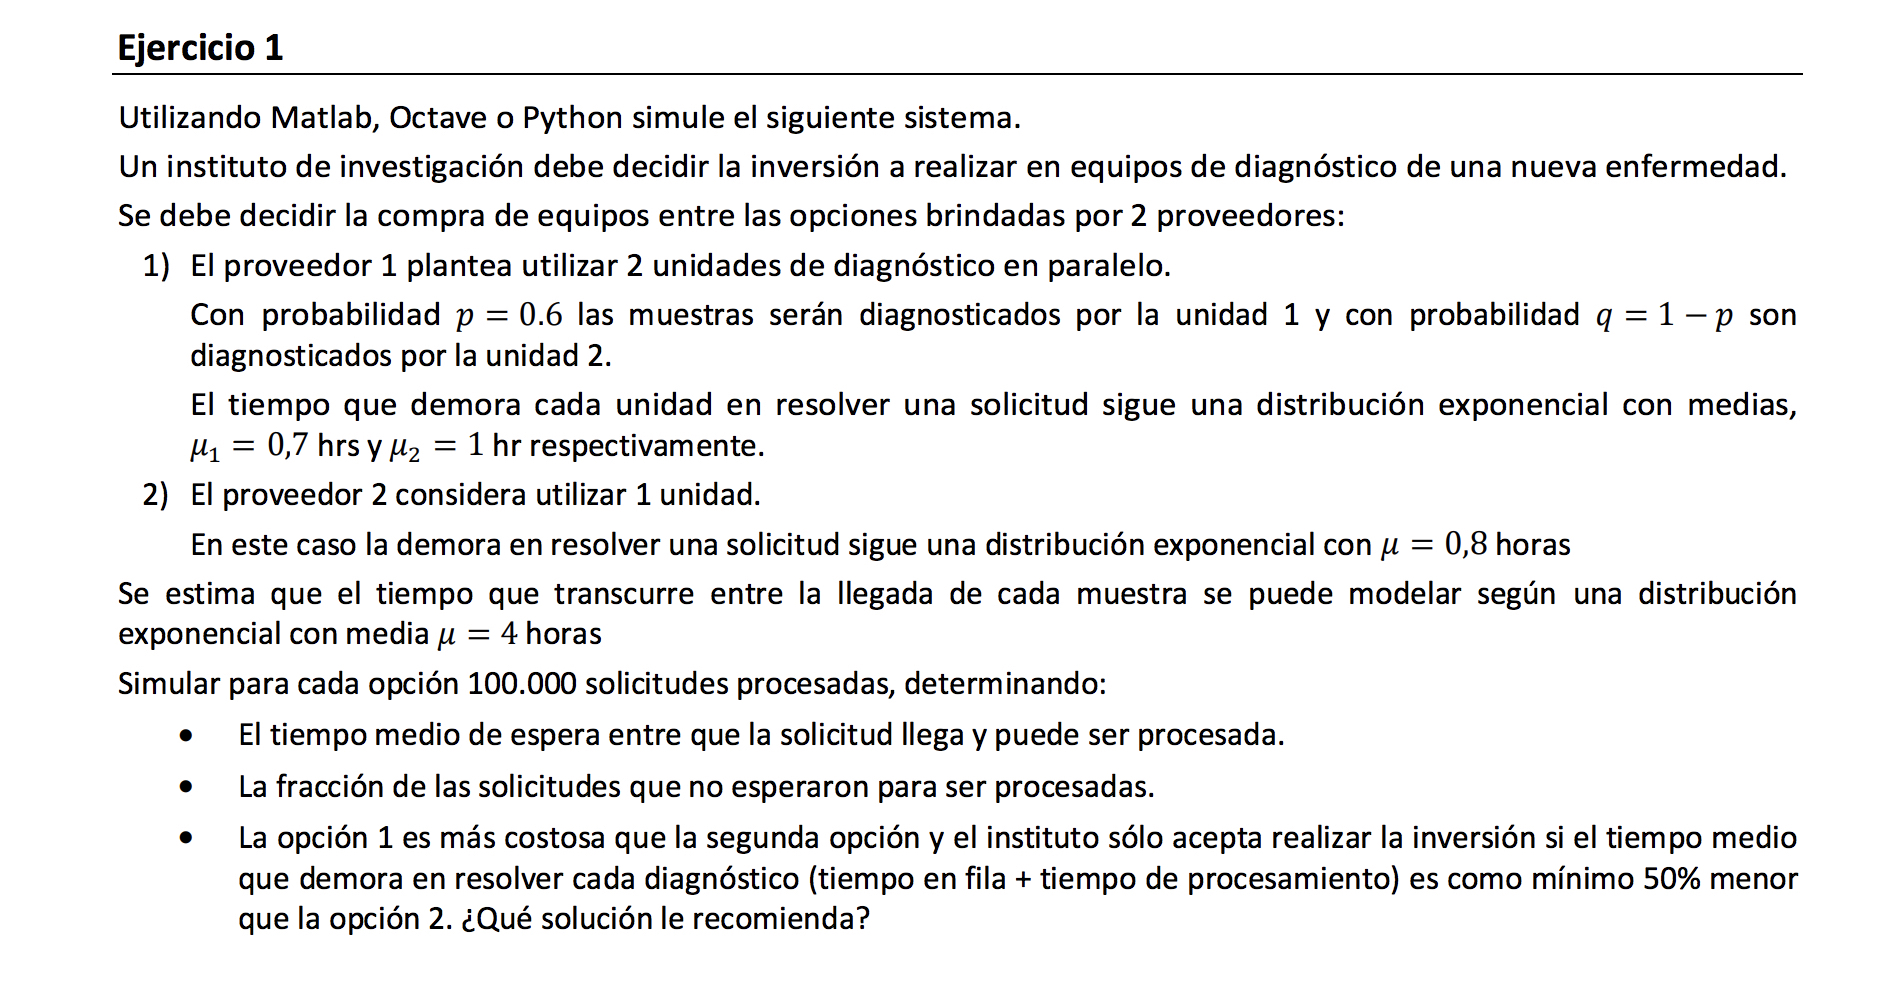

### Proveedor 1

La simulación se llevará a cabo de la siguiente forma:
    - En primer lugar, se simula el tiempo que demora en llegar una solicitud, desde la llegada de la anterior.
    Esto se hace con un generador de muestras de una exponencial con media 4.
    
    - Se tiene almacenado el tiempo de espera que vigente para cada una de las unidades de diagnóstico luego de la llegada de la solicitud anterior. A esos valores se les resta el tiempo transcurrido entre esta solicitud y la anterior, o se los setea a cero, en caso de que el tiempo de espera vigente fuese menor.
    
    - Luego, se simula la asignación de la muestra a una de las unidades de diagnóstico mediante la generación de uan variable uniforme entre 0 y 1, y su mapeo a la región [0,p) o [p,1]. 
    
    - Si el valor de la variable de tiempo de espera de la unidad a la que se asignó la muestra es mayor a cero, se lo suma al tiempo de espera total, y se incrementa un contador que registra la cantidad de muestras que debieron esperar.
    
    - Seguido a esto, se simula el tiempo que demora el diagnóstico de la muestra, mediante un generador de exponenciales con media 0.7 o 1 según la unidad de diagnóstico. 
    
    - El tiempo de diagnóstico se suma a una variable que guarda la suma del tiempo de diagnóstico de todas las muestras.
    
    - Se le suma al tiempo de espera de la unidad correspondiente el tiempo de diagnóstico de la muestra.
    
El proceso descripto se repite 100.000 veces. 

Una vez finalizado, se computa (con N = 100.000):
    - El tiempo medio de espera de cada muestra como la espera total sobre la cantidad de muestras (100.000)
    
$$
    \overline{T}_{\textrm{espera}} = \frac{\textrm{espera_total}}{N}
$$
    
    - La fracción de solicitudes que no esperaron como la diferencia entre las muestras totales y las que esperaron, sobre la cantidad de muestras totales
    
$$
    \textrm{fracción sin espera} = \frac{N - \textrm{con_espera}}{N}
$$

    - El tiempo medio que demora en resolverse cada diagnóstico, incluyendo espera y tiempo de diagnóstico.
    
$$
    \overline{T}_{\textrm{muestra}} = \frac{\textrm{espera_total} + \textrm{total_diag}}{N}
$$
    

In [2]:
# Parámetros
N = 100000
media_llegada = 4
media_diag1 = 0.7
media_diag2 = 1
p = 0.6

espera1 = 0
espera2 = 0
espera_total = 0
esperaron = 0
total_diag = 0
for i in range(0,N):
    t = expon.rvs(size=1,scale=media_llegada)[0]
    espera1 = 0 if espera1 - t < 0 else espera1 - t
    espera2 = 0 if espera2 - t < 0 else espera2 - t
    if np.random.rand() < p:
        
        if (espera1 > 0):
            esperaron+=1
            espera_total+=espera1
        t_diag = expon.rvs(size=1,scale=media_diag1)[0]
        total_diag += t_diag
        espera1 += t_diag
    
    else:
        
        if (espera2 > 0):
            esperaron+=1
            espera_total+=espera2
        t_diag = expon.rvs(size=1,scale=media_diag2)[0]
        total_diag += t_diag
        espera2 += t_diag

In [3]:
##Tiempo medio de espera por muestra (en horas)
espera_total / N

0.09107900550002083

In [4]:
# Fracción de muestras que no espera
(N - esperaron) / N

0.8982

In [5]:
# Tiempo medio de procesamiento de una muestra (en horas)
(total_diag + espera_total) / N

0.907676624584965

### Proveedor 2

En este caso, el proceso de simulación es análogo al usado para el proveedor 1, pero simplificado por el hecho de que hay una única unidad de diagnóstico y por lo tanto menos variables que simular.

In [6]:
media_llegada = 4
media_diag = 0.8

espera_total = 0
esperaron = 0
total_diag = 0
espera = 0

for i in range(0,N):
    t = expon.rvs(size=1,scale=media_llegada)[0]
    espera = 0 if espera - t < 0 else espera - t
    if (espera > 0):
        esperaron+=1
        espera_total+=espera
    t_diag = expon.rvs(size=1,scale=media_diag)[0]
    total_diag += t_diag
    espera += t_diag

In [7]:
##Tiempo medio de espera por muestra (en horas)
espera_total / N

0.20029164283719786

In [8]:
# Fracción de muestras que no espera
(N - esperaron) / N

0.80087

In [9]:
# Tiempo medio de procesamiento de una muestra (en horas)
(total_diag + espera_total) / N

1.0019960188641561

Vemos que todos los indicadores que se nos pidió extraer de la simulador favorecen al sistema ofrecido por el proveedor 1.

En primer lugar, en el sistema del proveedor 1, el tiempo medio de espera por muestra es de 0,09 horas o 5,4 minutos. En el sistema del proveedor 2, esta magnitud se duplicó, siendo el tiempo de espera promedio de unas 0,2 horas o 12 minutos.

La fracción de muestras que no esperaron a ser procesadas fue 0,9 (un 90%) en el sistema del proveedor 1 y 0,8 en el proveedor 2. 

Por último, el tiempo medio que requiere cada muestra, incluyendo espera y diagnóstico, fue de 0,9 horas en el sistema del proveedor 1, y de 1,0 horas en el del proveedor 2.

Si bien la opción 1 es claramente procesa las muestras con mayor velocidad, el tiempo medio de procesamiento (espera+diagnóstico) por muestra es solo un 10% menor que el de la opción 2. Esto es insuficiente para decidir por la compra de la opción 1, ya que se nos pide que el tiempo medio por muestra sea al menos 50% menor que el de la opción 2 para justificar su mayor costo.

En conclusión, en base al criterio del enunciado, la opción recomendada es la 2. 